In [1]:
from IPython.display import Image

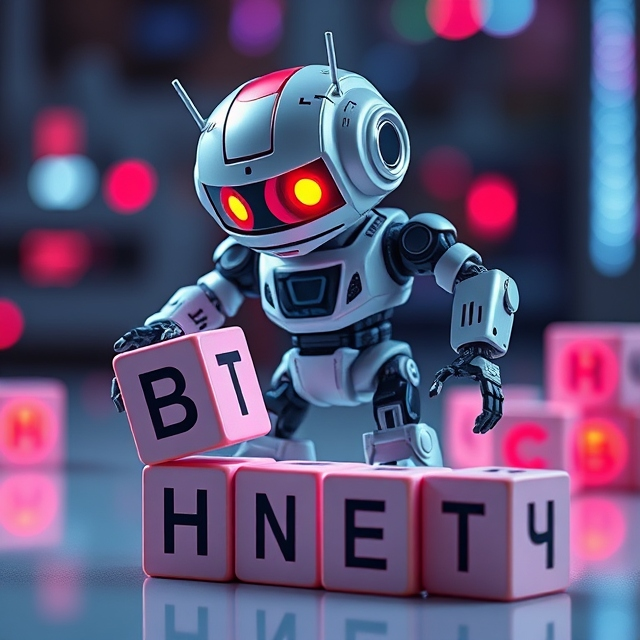

In [2]:
Image(filename = 'ToyGPT.jpeg')

# ToyGPT

#### ToyGPT, inspired by Andrej Karpathy’s GPT from scratch, creates a toy generative pre-trained transformer at its most basic level using a simple bigram language model with attention to help educate on the basics of creating an LLM from scratch.

### [original video from Andrej Karpathy](https://www.youtube.com/watch?v=kCc8FmEb1nY&t=175s)

#### Credit: [Andrej Karpathy](mailto:karpathy@eurekalabs.ai)
#### Instructor: [Kevin Thomas](mailto:ket189@pitt.edu)

## Mathematical Explanation of Attention and Neural Networks in the Transformer Architecture (Bigram Model Example with Multi-Head Attention)

---

### Introduction: Bigram Character-Level Language Model

This is a character-level bigram model that predicts the next character one at a time. Given an input string, the model learns to predict the next character in the sequence based on the preceding character. We'll walk through an example where the input is the sentence:

`"The dog ate my "` 
The goal is for the model to predict the next sequence of characters, `"homework"`, character by character.

---

### 1. Input and Encoding

The input string **"The dog ate my "** is converted into a sequence of integers based on a vocabulary of unique characters.

#### Vocabulary
Suppose the vocabulary consists of the following unique characters:
`[' ', 'T', 'a', 'd', 'e', 'g', 'h', 'k', 'm', 'o', 'r', 't', 'w', 'y']`

The vocabulary size is 14.

#### Encoding
Breaking the sentence **"The dog ate my "** into characters and mapping them using the vocabulary:
- `'T' → 1`
- `'h' → 6`
- `'e' → 4`
- `' ' → 0`
- `'d' → 3`
- `'o' → 5`
- `'g' → 7`
- `' ' → 0`
- `'a' → 2`
- `'t' → 8`
- `'e' → 4`
- `' ' → 0`
- `'m' → 9`
- `'y' → 13`
- `' ' → 0`

Thus, the string **"The dog ate my "** is encoded as:
`[1, 6, 4, 0, 3, 5, 7, 0, 2, 8, 4, 0, 9, 13, 0]`

---

### 2. Forward Pass

#### Token Embeddings
Each character in the sequence is passed through a token embedding table, which converts each integer into a dense vector of size `n_embd`.

If `n_embd = 4`, the token embedding table is a matrix of size [vocab_size, n_embd]. For example:
- `'T'` (1) → `[0.2, 0.1, -0.3, 0.8]`
- `'h'` (6) → `[0.5, -0.2, 0.1, 0.4]`
- `'e'` (4) → `[-0.1, 0.6, 0.3, -0.4]`

The encoded sequence `[1, 6, 4, 0, 3, 5, 7, 0, 2, 8, 4, 0, 9, 13, 0]` becomes:
`[[0.2, 0.1, -0.3, 0.8], [0.5, -0.2, 0.1, 0.4], ...]`

---

### 3. Self-Attention Mechanism

#### Query, Key, and Value Computation
The self-attention mechanism uses three learned weight matrices:
- Query weight matrix $W_Q \in \mathbb{R}^{n_{\text{embd}} \times d_k}$
- Key weight matrix $W_K \in \mathbb{R}^{n_{\text{embd}} \times d_k}$
- Value weight matrix $W_V \in \mathbb{R}^{n_{\text{embd}} \times d_v}$

Each input embedding $X_i$ is projected into three vectors:
- Query: $Q_i = X_i W_Q$
- Key: $K_i = X_i W_K$
- Value: $V_i = X_i W_V$

For example, if $X_i = [0.2, 0.1, -0.3, 0.8]$ and $W_Q = [[0.1, 0.2], [0.3, 0.4], [0.5, 0.6], [0.7, 0.8]]$, then:
- $Q_i = X_i W_Q = [0.2, 0.1, -0.3, 0.8] \cdot W_Q$

---

### 4. Multi-Head Attention

Multi-head attention allows the model to focus on different parts of the input sequence simultaneously by dividing the embeddings into multiple "heads." Each head computes its own self-attention, and the results are concatenated and projected back to the original dimension.

#### Steps in Multi-Head Attention

1. Split the embedding dimension `n_embd` into `h` heads:
   If `n_embd = 64` and `h = 4`, each head operates on a subspace of size `64 / 4 = 16`.

2. Compute attention for each head independently:
   Each head has its own $W_Q$, $W_K$, and $W_V$ matrices:
   $\text{Head}_i = \text{Attention}(XW_Q^i, XW_K^i, XW_V^i)$

3. Concatenate the outputs of all heads:
   $\text{MultiHead}(Q, K, V) = \text{Concat}(\text{Head}_1, \text{Head}_2, ..., \text{Head}_h)$

4. Project the concatenated output back to `n_embd`:
   $\text{Output} = \text{Concat}(\text{Heads}) W_O$
   where $W_O \in \mathbb{R}^{n_{\text{embd}} \times n_{\text{embd}}}$ is the final linear projection matrix.

---

#### Example of Multi-Head Attention
Suppose we have:
- $X = [0.2, 0.1, -0.3, 0.8]$
- $h = 2$ (two heads)
- $n_{\text{embd}} = 4$, so each head operates on a dimension of `4 / 2 = 2`.

For Head 1:
- $Q_1 = X W_Q^1$, $K_1 = X W_K^1$, $V_1 = X W_V^1$
- Compute $QK^T$, scale by $\sqrt{d_k}$, apply softmax, and weight $V_1$.

For Head 2:
- $Q_2 = X W_Q^2$, $K_2 = X W_K^2$, $V_2 = X W_V^2$
- Perform the same operations as Head 1.

Finally, concatenate the outputs:
$[\text{Head}_1, \text{Head}_2]$, and project using $W_O$.

---

### 5. Loss Function

After passing through the attention and feedforward layers, the model outputs logits for each character. The logits are converted to probabilities using the softmax function:

$P(y|x) = \frac{\exp(\text{logit}_y)}{\sum_{i} \exp(\text{logit}_i)}$

The loss is computed using cross-entropy:

$\text{Loss} = -\sum_{i} y_i \log(P(y_i))$

where $y_i$ is the one-hot encoded true label and $P(y_i)$ is the predicted probability for the correct character.

---

### 6. Backpropagation

#### Gradient Computation
Using the chain rule, gradients of the loss are computed for each layer:
$\frac{\partial \text{Loss}}{\partial W} = \frac{\partial \text{Loss}}{\partial \text{logits}} \cdot \frac{\partial \text{logits}}{\partial W}$

1. Compute $\frac{\partial \text{Loss}}{\partial \text{logits}}$:
   $\frac{\partial \text{Loss}}{\partial \text{logits}} = P(y) - y$

2. Propagate the gradients backward through:
   - Multi-head attention layers
   - Feedforward network
   - Embedding layers

---

### 7. Text Generation Example

Given the input "The dog ate my ", the model predicts the next character one at a time:

1. Input: `"The dog ate my "`
2. Encode the input into integers: `[1, 6, 4, 0, 3, 5, 7, 0, 2, 8, 4, 0, 9, 13, 0]`
3. Pass the encoded input through the model.
4. The model predicts the next character based on the previous one:
   - Input: `"The dog ate my "`
   - Predicted next character: `"h"`

Repeat the process:
- Input: `"The dog ate my h"`
- Predicted next character: `"o"`

Continue until the model generates the full sequence: `"homework"`.

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

# hyperparameters define the configuration of the model and training process
vocab = [' ', '.', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'w', 'y']
# stoi maps characters to integers for encoding
stoi = {ch: i for i, ch in enumerate(vocab)}
# itos maps integers back to characters for decoding
itos = {i: ch for i, ch in enumerate(vocab)}

vocab_size = len(vocab)  # number of unique characters in the vocabulary
n_embd = 32  # size of the embeddings (how many numbers represent each character)
block_size = 32  # maximum number of characters the model can look back on
n_heads = 4  # number of attention heads (splitting embedding into parts for parallel focus)
n_layers = 3  # number of transformer layers (stacked processing blocks)
dropout = 0.3  # random "dropping out" of connections during training to prevent overfitting
# decide whether to use GPU, MPS (Mac), or CPU based on availability
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f"Using device: {device}")

# a short dataset encoded as a string for training
data_str = "The dog ate my homework. The cat drank milk. The bird flew high. The dog ate my homework."
# convert each character to its integer representation and move the tensor to the appropriate device
data = torch.tensor([stoi[ch] for ch in data_str], dtype=torch.long).to(device)


class MultiHeadSelfAttention(nn.Module):
    """
    Implements multi-head self-attention, which allows the model to focus on different parts 
    of the input sequence in parallel.

    Each head is responsible for attending to specific parts of the sequence. Results are 
    concatenated and projected back to the original dimension.
    """

    def __init__(self, n_embd, n_heads):
        """
        Initialize the MultiHeadSelfAttention module.

        Args:
            n_embd (int): The size of the input embeddings.
            n_heads (int): The number of attention heads.
        """
        super().__init__()
        self.n_heads = n_heads
        self.head_size = n_embd // n_heads  # each head operates on a part of the embedding
        self.query = nn.Linear(n_embd, n_embd, bias=False)  # transforms input to query
        self.key = nn.Linear(n_embd, n_embd, bias=False)  # transforms input to key
        self.value = nn.Linear(n_embd, n_embd, bias=False)  # transforms input to value
        self.proj = nn.Linear(n_embd, n_embd)  # combines attention outputs from all heads
        self.dropout = nn.Dropout(dropout)  # randomly removes parts of data during training
        # lower triangular mask to prevent attending to future tokens
        self.register_buffer("mask", torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        """
        Forward pass for self-attention.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, sequence_length, embedding_dim).

        Returns:
            torch.Tensor: Output tensor of the same shape as input.
        """
        B, T, C = x.shape  # batch size, sequence length, embedding dimension
        # project the input into query, key, and value matrices
        q = self.query(x).view(B, T, self.n_heads, self.head_size).transpose(1, 2)
        k = self.key(x).view(B, T, self.n_heads, self.head_size).transpose(1, 2)
        v = self.value(x).view(B, T, self.n_heads, self.head_size).transpose(1, 2)

        # compute attention scores by taking dot product of queries and keys
        att = (q @ k.transpose(-2, -1)) / self.head_size**0.5
        # apply the lower triangular mask to prevent looking at future tokens
        att = att.masked_fill(self.mask[:T, :T] == 0, float('-inf'))
        # normalize the attention scores
        att = F.softmax(att, dim=-1)
        att = self.dropout(att)  # apply dropout to the attention scores

        # compute the weighted sum of values based on attention scores
        y = (att @ v).transpose(1, 2).contiguous().view(B, T, C)
        return self.proj(y)  # project the result back to the embedding dimension


class TransformerBlock(nn.Module):
    """
    A single transformer block that combines multi-head self-attention and a feedforward network.
    """

    def __init__(self, n_embd, n_heads):
        """
        Initialize the TransformerBlock.

        Args:
            n_embd (int): The size of the input embeddings.
            n_heads (int): The number of attention heads.
        """
        super().__init__()
        self.attn = MultiHeadSelfAttention(n_embd, n_heads)  # multi-head attention layer
        # feedforward network with two layers
        self.ffn = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),  # expand dimension for non-linearity
            nn.ReLU(),  # non-linear activation function
            nn.Linear(4 * n_embd, n_embd),  # project back to embedding dimension
            nn.Dropout(dropout),  # prevent overfitting
        )
        self.ln1 = nn.LayerNorm(n_embd)  # layer normalization for better stability
        self.ln2 = nn.LayerNorm(n_embd)  # second layer normalization

    def forward(self, x):
        """
        Forward pass through the transformer block.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, sequence_length, embedding_dim).

        Returns:
            torch.Tensor: Output tensor of the same shape as input.
        """
        x = x + self.attn(self.ln1(x))  # apply attention and add residual connection
        x = x + self.ffn(self.ln2(x))  # apply feedforward network and residual connection
        return x


class ToyGPT(nn.Module):
    """
    A simplified GPT-like model for character-level sequence generation.
    """

    def __init__(self, vocab_size, n_embd, n_heads, n_layers, block_size):
        """
        Initialize the ToyGPT model.

        Args:
            vocab_size (int): The size of the vocabulary.
            n_embd (int): The size of the input embeddings.
            n_heads (int): The number of attention heads.
            n_layers (int): The number of transformer layers.
            block_size (int): The maximum sequence length.
        """
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, n_embd)  # character embedding layer
        self.position_embedding = nn.Embedding(block_size, n_embd)  # positional encoding
        self.blocks = nn.Sequential(*[TransformerBlock(n_embd, n_heads) for _ in range(n_layers)])
        self.ln_f = nn.LayerNorm(n_embd)  # final layer normalization
        self.head = nn.Linear(n_embd, vocab_size)  # final projection to vocabulary size

    def forward(self, idx, targets=None):
        """
        Forward pass through the ToyGPT model.

        Args:
            idx (torch.Tensor): Input tensor of shape (batch_size, sequence_length).
            targets (torch.Tensor): Target tensor of the same shape as input (optional).

        Returns:
            tuple: Logits tensor and loss (if targets are provided).
        """
        B, T = idx.shape
        if T > block_size:
            raise ValueError(f"Sequence length {T} exceeds block size {block_size}")
        tok_emb = self.token_embedding(idx)  # map tokens to embeddings
        pos_emb = self.position_embedding(torch.arange(T, device=idx.device))  # add positional information
        x = tok_emb + pos_emb.unsqueeze(0)  # combine token and position embeddings
        x = self.blocks(x)  # pass through transformer blocks
        x = self.ln_f(x)  # apply final normalization
        logits = self.head(x)  # map to vocabulary size

        if targets is None:
            return logits, None
        else:
            # compute cross-entropy loss between predictions and targets
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
            return logits, loss

    def generate(self, idx, max_new_tokens):
        """
        Generate new tokens using the model.

        Args:
            idx (torch.Tensor): Input tensor of shape (batch_size, sequence_length).
            max_new_tokens (int): Number of tokens to generate.

        Returns:
            torch.Tensor: Generated sequence of tokens.
        """
        for _ in range(max_new_tokens):
            # crop context to the block size (truncate sequence to fit model capacity)
            idx_cond = idx[:, -block_size:]  
            
            # get the logits (predictions) for the current sequence
            logits, _ = self(idx_cond)  
            
            # extract logits for the last time step (focus on the most recent prediction)
            logits = logits[:, -1, :]  

            # apply softmax to convert logits to probabilities for each token
            probs = F.softmax(logits, dim=-1)  

            # sample the next token from the probability distribution
            next_token = torch.multinomial(probs, num_samples=1)  

            # append the sampled token to the sequence
            idx = torch.cat((idx, next_token), dim=1)  
        
        return idx  # return the full generated sequence


# initialize the ToyGPT model with specified hyperparameters
model = ToyGPT(vocab_size, n_embd, n_heads, n_layers, block_size).to(device)

# initialize the AdamW optimizer with a learning rate
optimizer = torch.optim.AdamW(model.parameters(), lr=0.003)

# training loop to optimize the model parameters
for epoch in range(100):  
    model.train()  # set the model to training mode
    for i in range(len(data) - block_size):  
        # create input sequences (context) and target sequences
        inputs = data[i:i + block_size].unsqueeze(0)  
        targets = data[i + 1:i + block_size + 1].unsqueeze(0)  
        
        # forward pass through the model
        logits, loss = model(inputs, targets)  

        # clear gradients from the previous step
        optimizer.zero_grad()  

        # backpropagate to compute gradients
        loss.backward()  

        # update model parameters
        optimizer.step()  

    # print the loss every 100 epochs
    if epoch % 100 == 0:  
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# save only the model's state dictionary (weights)
model_path = "toy_gpt_model.pth"  # specify the file name
torch.save(model.state_dict(), model_path)  
print(f"Model weights saved to {model_path}")

# load the model weights into a new instance of the ToyGPT model
loaded_model = ToyGPT(vocab_size, n_embd, n_heads, n_layers, block_size).to(device)

# load the saved state dictionary into the new model
state_dict = torch.load(model_path, map_location=device, weights_only=True)  
loaded_model.load_state_dict(state_dict)  
print("Model weights loaded successfully.")

# generate new text starting with the character 'T'
context = torch.tensor([[stoi['T']]], device=device)  # encode the starting character
generated = loaded_model.generate(context, max_new_tokens=50)  # generate 50 tokens
decoded_sequence = ''.join([itos[i] for i in generated.squeeze().tolist()])  # decode generated tokens
print("Generated Sequence:", decoded_sequence)

Using device: mps
Epoch 0, Loss: 1.754841923713684
Model weights saved to toy_gpt_model.pth
Model weights loaded successfully.
Generated Sequence: The dog ate my homework. The cat drank milk. The bi
